### 6. Multi Task Learning (12 points)

This question concerns the practice of multi-task learning (MTL). 
The aim of multi task learning is to leverage two (or more) related tasks in the learning process with the hope that leanring one task aids perfromance in learning the other task(s) and thus improves predicitve power for at least one (ideally all) of the tasks. 

There are two distinct flavours of MTL: Hard parameter  sharing and soft parameter sharing. We will be focusing on the former in this question.
Hard paramter sharing occurs when two tasks share a common network which then splits into task specific paths (e.g. a series of convolutional layers with two paths of dense layers for two seperate tasks). 

In this question, you will explore the FASHION MNIST dataset and be coding up your own MTL model and considering the pros and cons of MTL compared to single task learning. 

We have written the code to pre-load this dataset and split it into two related tasks for you:

- Task 1 - Clothing item 10 class classification (e.g. shoes, t-shirts etc) across 10 goups - $ y \in \mathbb{R^{10}} $
- Task 2 - Clothing group three class classification - predicitng whether a viewed clothing image belongs to one of three groups - $ y \in \mathbb{R^{3}} $
    - These groups are shoes (Sandal, Sneaker and Ankle Boot),  Gendered (Dress, Shirt and Bag) and Uni-Sex (T-shirt, Trouser, Pullover and Coat). 


#### Note : Alternativley use the tf.nn module. 

#### Note  : We advise the use of only a single epoch for this question for the sake of computation time.  However, if you want to utilise additional epochs feel free to do so just be aware of the longer training time and be consistent over all networks. 

In [11]:
"""
Code for loading the dataset
"""
import keras.datasets.fashion_mnist as fashion_mnist
from keras.utils import to_categorical

def load_data(): 
    # train_X: (60000, 28, 28)
    # train_y: (60000,)
    # test_X: (10000, 28, 28)
    # test_y: (10000,)
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10
    # map to new label
    train_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in train_y_1)  
    test_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in test_y_1)
    n_class_2 = 3
    # train_X: (60000, 28, 28, 1)
    # test_X: (10000, 28, 28, 1)
    # train_y: (60000, n_class = 10)
    # test_y: (10000, n_class = 3)
    train_X = np.expand_dims(train_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)
    train_y_1 = to_categorical(train_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)
    train_y_2 = to_categorical(train_y_2, n_class_2)
    test_y_2 = to_categorical(test_y_2, n_class_2)
    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2


x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

Using TensorFlow backend.


#### Task 6.1

In this question you will construct two seperate networks of identical structure (excpet the logits and pred layers) one for each of the two tasks.

In other words, create a network for item classification and a network for item group classification. 


Complete the Task_1_NN and Task_2_NN below. These single task networks will form the basis of your work in this question. 

For the sake of convieience, we will use the same CNN filters as Question 4 - $[32, 64, 128]$. However our kernel size will be 3 $\times$ 3 and a stride of 1 for all convolutional layers. Maxpooling layers will also need to be implemented after the first and second convolutional layers. These maxpooling layers have a kernel size of two and a stride of 2. 

After the final convolution, flatten the outputs and pass them to dense layers $[3136, 1024, 100 , N]$ where $N$ is the number of outputs required (10 or 3). 

As with Question 4, the function 'create_model' to be cpomplemted defines the class variables:
 - Task 1
     - self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected (i.e. dense) layer</font>.__ 
     - self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.
 - Task 2
      - self.logits $\in \mathbb{R^{3}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 
      - self.preds $\in \mathbb{R^{3}}$ containing posterior probabilities.
      
The method definitons remain the same  as in previous questions. 
      
      
#### Note: We advise you save the number of parameters and accuracy of the models in order to save time later. 

In [12]:
class Task_1_NN():
    def __init__(self, x_train, y_train_1,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
    
    def create_model(self):            
        with tf.variable_scope("Task_1", reuse=tf.AUTO_REUSE):
            
            inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_1_in')
            self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=2, padding='SAME', name='mtl_1_p1')
            self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_1_c1')
            self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_1_p2')
            self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_1_c2')
            self.flatten = tf.layers.flatten(self.conv2, name='mtl_1_f')
            self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_1_d1', reuse=False) 
            self.dense2 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_1_d2', reuse=False) 
            self.dense3 = tf.layers.dense(inputs=self.dense2, units=100, activation=tf.nn.relu, name='mtl_1_d3', reuse=False) 
            
            ######### Complete the function ######### 
            self.logits = tf.layers.dense(inputs=self.dense3, units=10, name='mtl_1_out_', reuse=False) 
            self.pred_1 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.losses.softmax_cross_entropy(self.y_1, self.logits)
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_1) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_1, var_list=self.model_vars)
            
    
    def getComplexity(self):
        total_parameters = 0
        for variable in tf.trainable_variables():
            # shape is an array of tf.Dimension
            shape = variable.get_shape()
            variable_parameters = 1
            for dim in shape:
                variable_parameters *= dim
            total_parameters += variable_parameters
        self.compx = tf.constant(total_parameters) 
            


In [13]:
class Task_2_NN():
    def __init__(self, x_train, y_train_2,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_2 = y_train_2
        self.m = x_train.shape[0]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")
    
    def create_model(self):            
        with tf.variable_scope("Task_2", reuse=tf.AUTO_REUSE):
            
            inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_2_in')
            self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=2, padding='SAME', name='mtl_2_p1')
            self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_2_c1')
            self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_2_p2')
            self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_2_c2')
            self.flatten = tf.layers.flatten(self.conv2, name='mtl_2_f')
            self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_2_d1', reuse=False) 
            self.dense2 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_2_d2', reuse=False) 
            self.dense3 = tf.layers.dense(inputs=self.dense2, units=100, activation=tf.nn.relu, name='mtl_2_d3', reuse=False)
            
            ######### Complete the function ######### 
            self.logits = tf.layers.dense(inputs=self.dense3, units=3, name='mtl_2_out_', reuse=False) 
            self.pred_2 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_2 = tf.losses.softmax_cross_entropy(self.y_2, self.logits)
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_2) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_2, var_list=self.model_vars)
            
    def getComplexity(self):
        total_parameters = 0
        for variable in tf.trainable_variables():
            # shape is an array of tf.Dimension
            shape = variable.get_shape()
            variable_parameters = 1
            for dim in shape:
                variable_parameters *= dim
            total_parameters += variable_parameters
        self.compx = tf.constant(total_parameters) 

#### Now train and test Task 1:

In [14]:

model_1 = Task_1_NN(x_train, y_train_1, './Task1_logdir/', 0.001, 2, 10)            
model_1.create_model()     

model_1.compute_loss()
model_1.optimizer()   

model_1.optimizer()
model_1.getComplexity()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_1.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_1.output_dir):
    os.makedirs(model_1.output_dir)  
    
print(sess.run(model.compx))

"""
Train
"""
train_accuracies = []
test_accuracies = []

for epoch in range(model_1.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_1.x_train[randomize,:]
    y_in_1 = model_1.y_train_1[randomize,:]
    for i in range(model_1.nb_iterations):
        input_x_train = x_in[i*model_1.batch_size: (i+1)*model_1.batch_size]
        input_y_train_1 = y_in_1[i*model_1.batch_size: (i+1)*model_1.batch_size]
        _ , preds_1, loss_1, loss_summ = sess.run([model_1.trainer, model_1.pred_1,  model_1.loss_task_1, model_1.loss_summ], 
                                 feed_dict={model_1.X: input_x_train, 
                                            model_1.y_1: input_y_train_1})

        y_preds_1 = np.argmax(preds_1, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        train_accuracies.append(acc_train_1)
        writer.add_summary(loss_summ, epoch * model_1.nb_iterations + i)
        
    saver.save(sess, model_1.output_dir, global_step=epoch) 
end = time.time()
print("done")

185066
Epoch 0, Iteration 0, loss_1 14.061,  batch accuracy_1 0.100
Epoch 1, Iteration 0, loss_1 33.893,  batch accuracy_1 0.100
done


In [15]:
"""
Test
"""


batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1 = sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1= sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
print(all_preds_1)
print(y_real_1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)

[3 3 3 ... 3 3 3]
[9 2 1 ... 8 1 5]
Test accuracy - task 1 achieved: 0.100


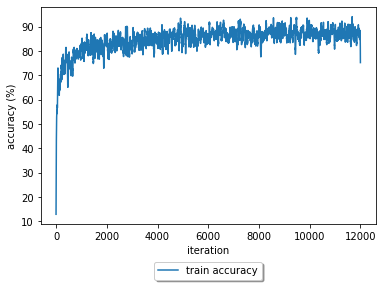

In [141]:
from scipy.signal import savgol_filter
plt.figure()
#plt.ylim(90, 100)
tr_ac = savgol_filter(train_accuracies, 51, 3)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')
te_ac = savgol_filter(test_accuracies, 51, 3)
#plt.plot([i for i in range(0, len(te_ac))], te_ac*100, label='test error', color='darkorange')
plt.plot([i for i in range(0, len(tr_ac))], tr_ac*100, label='train accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.subplots_adjust(hspace = 0.2)
plt.savefig('MTL_1_performance.png', bbox_inches="tight")
plt.show()

In [88]:
sess.close()

#### Now train and test Task 2

In [16]:
model_2 = Task_2_NN(x_train, y_train_2, './Task2_logdir/', 0.001, 2, 10)            
model_2.create_model()     

model_2.compute_loss()
model_2.optimizer()   

model_2.optimizer()
model_2.getComplexity()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_2.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_2.output_dir):
    os.makedirs(model_2.output_dir)
    
print(sess.run(model.compx))

"""
Train
"""
train_accuracies_1 = []

for epoch in range(model_2.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_2.x_train[randomize,:]
    y_in_2 = model_2.y_train_2[randomize,:]
    for i in range(model_2.nb_iterations):
        input_x_train = x_in[i*model_2.batch_size: (i+1)*model_2.batch_size]
        input_y_train_2 = y_in_2[i*model_2.batch_size: (i+1)*model_2.batch_size]
        _ , preds_2, loss_2, loss_sum = sess.run([model_2.trainer, model_2.pred_2,  model_2.loss_task_2, model_2.loss_summ], 
                                 feed_dict={model_2.X: input_x_train, 
                                            model_2.y_2: input_y_train_2})
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        train_accuracies_1.append(acc_train_2)
        writer.add_summary(loss_sum, epoch * model_2.nb_iterations + i)
    saver.save(sess, model_2.output_dir, global_step=epoch) 

185066
Epoch 0, Iteration 0, loss_2 8.028, batch accuracy_2 0.200
Epoch 1, Iteration 0, loss_2 59.766, batch accuracy_2 0.300


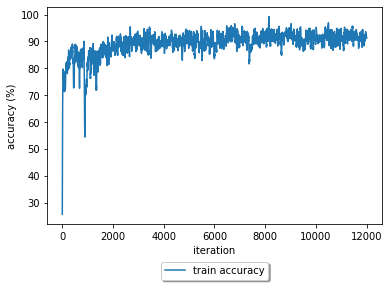

In [143]:
from scipy.signal import savgol_filter
plt.figure()
#plt.ylim(90, 100)
tr_ac = savgol_filter(train_accuracies_1, 51, 3)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')
#te_ac = savgol_filter(test_accuracies_1, 51, 3)
#plt.plot([i for i in range(0, len(te_ac))], te_ac*100, label='test error', color='darkorange')
plt.plot([i for i in range(0, len(tr_ac))], tr_ac*100, label='train accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.subplots_adjust(hspace = 0.2)
plt.savefig('MTL_2_performance.png', bbox_inches="tight")
plt.show()

In [127]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0]
nb_iterations = nb_test_points//batch_size_test
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_2 = sess.run(model_2.pred_2, 
                             feed_dict={model_2.X: input_x_test})
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_2= sess.run([model_2.pred_2], 
                             feed_dict={model_2.X: input_x_test})
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)

print('Test accuracy - task 2 achieved: %.3f' %acc_test_2) 


Test accuracy - task 2 achieved: 0.920


In [45]:
sess.close()

#### Task 6.2 - Building a MTL Network

In this question, we wish for you to complete the MTL class below and use it to train and test a MTL model on the two MNIST fashion tasks. 

Similar to Questions 3 and 4, our MTL class is initiliased via
 - x_train, the training matrix
 - y_train_1, the fashion labels for task 1 (Fashion Item  classification)
 - y_train_2, the labels for task 2 (Fashion Group classification)
 - $\lambda \in [0,1]$ , lambda_, the loss weight for task 1 (1- $\lambda$) is the loss weight for task 2
 - output_dir, the directory where model parameters and tensorbaord event files will be stored. 
 - lr, the learning rate of the ADAM optimiser 
 - nb_epochs, the number of epochs to use
 - batch_size, the number of data points in each mini-batch

Our MTL architecture will be comprised of a shared CNN backbone of three convolutional layers and a single shared dense layer with pooling between the first two pairs of convolutions.  The output of the shared dense layer is passed to two series of task specific dense layers, one for each of the two tasks. 

The architecture is as follows:
 - Shared Convolutional layers $[32, 64, 128]$ with max pooling after the first and second conv layers
     - kernel size ($ 3 \times 3$) for conv and ($2 \times 2$) for max pool
     - stride 1 for conv and 2 for max pooling
 - Flatten 
 - Shared Dense Layer $[3136]$ - the outputs of which are passed to the two task dense layers
 - Task 1 Dense Layers $[1024, 100, 10]$ - 10 is the dimenson of the logits/preds
 - Task 2 Dense Layers $[1024, 100, 3]$ - 3 is the dimenson of the logits/preds 
 - Task 1 Activation Layer - as earlier we use softmax
 - Task 2 Activation Layer  - as earlier we use softmax

This architecture is illustrated in the figure below minus the flattening layer.


<img src="mtl_2.jpg" alt="The MTL network" title="MTL Architecture" />

 
 The function 'create_model' defines the class variables:
  - self.logits_1 $\in \mathbb{R^{10}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 1 task layers. 
  - self.logits_2 $\in \mathbb{R^{3}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 2 task layers
  - self.preds_1 $\in \mathbb{R^{10}}$ containing posterior probabilities for the first task.
  - self.preds_2 $\in \mathbb{R^{3}}$ containing posterior probabilities for the second task.
  
As above, use self.logits to complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss albeit for each task. 

The total loss which is a sum of the weighted losses from tasks 1 and 2 ($\lambda * L_1 + (1-\lambda) * L_2$) is passed to the optimiser. 

#### For this question set $\lambda$ to be 0.5 for equal weighting. 

 #### Note: Do not worry about the optimiser - we still only need one optimiser for joint training of the MTL network 
      - The tasks can be trained alternately but this has its drawbacks

In [17]:
class MTL:
    def __init__(self, x_train, y_train_1, y_train_2, lambda_, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.y_train_2 = y_train_2
        self.lambda_ = lambda_
        
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")

    
    def create_model(self, config):            
        with tf.variable_scope("MTL", reuse=tf.AUTO_REUSE):
            
            ### Complete the function #####
            
            if config[0] == 0:
            
                inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_in')
                self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=2, padding='SAME', name='mtl_p1')
                self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c1')
                self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_p2')
                self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c2')
                self.flatten = tf.layers.flatten(self.conv2, name='mtl_f')
                self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_d1', reuse=False)

                self.dense2_1 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_1', reuse=False)
                self.dense3_1 = tf.layers.dense(inputs=self.dense2_1, units=100, activation=tf.nn.relu, name='mtl_d3_1', reuse=False)
                self.dense2_2 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_2', reuse=False)
                self.dense3_2 = tf.layers.dense(inputs=self.dense2_2, units=100, activation=tf.nn.relu, name='mtl_d3_2', reuse=False)

                self.logits_1 = tf.layers.dense(inputs=self.dense3_1, units=10, name='mtl_out_1')
                self.pred_1 = tf.nn.softmax(self.logits_1)

                self.logits_2 = tf.layers.dense(inputs=self.dense3_2, units=3, name='mtl_out_2')
                self.pred_2 = tf.nn.softmax(self.logits_2)
                
            if config[0] == 1:
                
                inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_in' + str(config[0]))
                self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=2, padding='SAME', name='mtl_p1' + str(config[0]))
                self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c1' + str(config[0]))
                self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_p2' + str(config[0]))
                self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c2' + str(config[0]))
                self.flatten = tf.layers.flatten(self.conv2, name='mtl_f' + str(config[0]))
                self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_d1' + str(config[0]), reuse=False)

                self.logits_1 = tf.layers.dense(inputs=self.dense1, units=10, name='mtl_out_1' + str(config[0]))
                self.pred_1 = tf.nn.softmax(self.logits_1)

                self.logits_2 = tf.layers.dense(inputs=self.dense1, units=3, name='mtl_out_2' + str(config[0]))
                self.pred_2 = tf.nn.softmax(self.logits_2)
                
            if config[0] == 2:
                
                inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_in_' + str(config[0]))
                self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=1, padding='SAME', name='mtl_p1_' + str(config[0]))
                self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c1_' + str(config[0]))
                self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_p2_' + str(config[0]))
                self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c2_' + str(config[0]))
                self.flatten = tf.layers.flatten(self.conv2, name='mtl_f_' + str(config[0]))
                self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_d1_' + str(config[0]), reuse=False)

                self.dense2_1 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_1_' + str(config[0]), reuse=False)
                self.dense3_1 = tf.layers.dense(inputs=self.dense2_1, units=100, activation=tf.nn.relu, name='mtl_d3_1_' + str(config[0]), reuse=False)
                self.dense2_2 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_2_' + str(config[0]), reuse=False)
                self.dense3_2 = tf.layers.dense(inputs=self.dense2_2, units=100, activation=tf.nn.relu, name='mtl_d3_2_' + str(config[0]), reuse=False)

                self.logits_1 = tf.layers.dense(inputs=self.dense3_1, units=10, name='mtl_out_1_' + str(config[0]))
                self.pred_1 = tf.nn.softmax(self.logits_1)

                self.logits_2 = tf.layers.dense(inputs=self.dense3_2, units=3, name='mtl_out_2_' + str(config[0]))
                self.pred_2 = tf.nn.softmax(self.logits_2)
                
            if config[0] == 3:
                
                inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_in_' + str(config[0]))
                self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=4, strides=4, padding='SAME', name='mtl_p1_' + str(config[0]))
                self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[3,3], activation=tf.nn.relu, name='mtl_c1_' + str(config[0]))
                self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=4, strides=4, padding='SAME', name='mtl_p2_' + str(config[0]))
                self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[2,2], activation=tf.nn.relu, name='mtl_c2__' + str(config[0]))
                self.pool3 = tf.nn.max_pool2d(input=self.conv2, ksize=4, strides=4, padding='SAME', name='mtl_p3_' + str(config[0]))
                self.flatten = tf.layers.flatten(self.pool3, name='mtl_f_' + str(config[0]))
                self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_d1_' + str(config[0]), reuse=False)

                self.dense2_1 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_1_' + str(config[0]), reuse=False)
                self.dense3_1 = tf.layers.dense(inputs=self.dense2_1, units=100, activation=tf.nn.relu, name='mtl_d3_1_' + str(config[0]), reuse=False)
                self.dense2_2 = tf.layers.dense(inputs=self.dense1, units=1024, activation=tf.nn.relu, name='mtl_d2_2_' + str(config[0]), reuse=False)
                self.dense3_2 = tf.layers.dense(inputs=self.dense2_2, units=100, activation=tf.nn.relu, name='mtl_d3_2_' + str(config[0]), reuse=False)

                self.logits_1 = tf.layers.dense(inputs=self.dense3_1, units=10, name='mtl_out_1_' + str(config[0]))
                self.pred_1 = tf.nn.softmax(self.logits_1)

                self.logits_2 = tf.layers.dense(inputs=self.dense3_2, units=3, name='mtl_out_2_' + str(config[0]))
                self.pred_2 = tf.nn.softmax(self.logits_2)
                
            if config[0] == 4:
                
                inputL = tf.layers.conv2d(inputs=self.X, filters=32, strides=1, kernel_size=[6,6], activation=tf.nn.relu, name='mtl_in' + str(config[0]))
                self.pool1 = tf.nn.max_pool2d(input=inputL, ksize=2, strides=2, padding='SAME', name='mtl_p1' + str(config[0]))
                self.conv1 = tf.layers.conv2d(inputs=self.pool1, filters=64, strides=1, kernel_size=[6,6], activation=tf.nn.relu, name='mtl_c1' + str(config[0]))
                self.pool2 = tf.nn.max_pool2d(input=self.conv1, ksize=2, strides=2, padding='SAME', name='mtl_p2' + str(config[0]))
                self.conv2 = tf.layers.conv2d(inputs=self.pool2, filters=128, strides=1, kernel_size=[4,4], activation=tf.nn.relu, name='mtl_c2_' + str(config[0]))
                self.flatten = tf.layers.flatten(self.conv2, name='mtl_f' + str(config[0]))
                self.dense1 = tf.layers.dense(inputs=self.flatten, units=3136, activation=tf.nn.relu, name='mtl_d1_' + str(config[0]), reuse=False)
                self.dense2 = tf.layers.dense(inputs=self.dense1, units=2048, activation=tf.nn.relu, name='mtl_d2' + str(config[0]), reuse=False)

                self.dense2_1 = tf.layers.dense(inputs=self.dense2, units=1024, activation=tf.nn.relu, name='mtl_d2_1_' + str(config[0]), reuse=False)
                self.dense3_1 = tf.layers.dense(inputs=self.dense2_1, units=100, activation=tf.nn.relu, name='mtl_d3_1_' + str(config[0]), reuse=False)
                self.dense2_2 = tf.layers.dense(inputs=self.dense2, units=1024, activation=tf.nn.relu, name='mtl_d2_2_' + str(config[0]), reuse=False)
                self.dense3_2 = tf.layers.dense(inputs=self.dense2_2, units=100, activation=tf.nn.relu, name='mtl_d3_2_' + str(config[0]), reuse=False)

                self.logits_1 = tf.layers.dense(inputs=self.dense3_1, units=10, name='mtl_out_1' + str(config[0]))
                self.pred_1 = tf.nn.softmax(self.logits_1)

                self.logits_2 = tf.layers.dense(inputs=self.dense3_2, units=3, name='mtl_out_2' + str(config[0]))
                self.pred_2 = tf.nn.softmax(self.logits_2)
        
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.losses.softmax_cross_entropy(self.y_1, self.logits_1)

            self.loss_task_2 = tf.losses.softmax_cross_entropy(self.y_2, self.logits_2)

            self.loss_total = self.lambda_*self.loss_task_1 + (1-self.lambda_)*self.loss_task_2 
            #########################################
            self.loss_task_1_graph = tf.summary.scalar("softmax_loss_task_1", self.loss_task_1) 
            self.loss_task_2_graph = tf.summary.scalar("softmax_loss_task_2", self.loss_task_2)             
            self.loss_sum = tf.summary.scalar("softmax_loss", self.loss_total) 
            
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_total, var_list=self.model_vars)
            
    def getComplexity(self):
        total_parameters = 0
        for variable in tf.trainable_variables():
            # shape is an array of tf.Dimension
            shape = variable.get_shape()
            variable_parameters = 1
            for dim in shape:
                variable_parameters *= dim
            total_parameters += variable_parameters
        self.compx = tf.constant(total_parameters)

In [18]:
"""
Create model and initialise it and tensorflow session
"""


model = MTL(x_train, y_train_1, y_train_2, 0.5, './MTL_logdir/', 0.001, 2, 10)             #       
model.create_model([0])     

model.compute_loss()
model.optimizer()   
model.getComplexity()

model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir) 

##### Now train and test your MTL model

In [19]:
"""
Train
"""

#train_accuracies_5a_1 = []
#train_accuracies_5a_2 = []

startT = time.time() 

for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in_1 = model.y_train_1[randomize,:]
    y_in_2 = model.y_train_2[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_1 = y_in_1[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_2 = y_in_2[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds_1, preds_2, loss_1, loss_2, loss_summ= sess.run([model.trainer, model.pred_1, model.pred_2, model.loss_task_1, model.loss_task_2, model.loss_sum], 
                                 feed_dict={model.X: input_x_train, 
                                            model.y_1: input_y_train_1,
                                            model.y_2: input_y_train_2})

        y_preds_1 = np.argmax(preds_1, axis=1)
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        #train_accuracies_5a_1.append(acc_train_1)
        #train_accuracies_5a_2.append(acc_train_2)
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch) 
end = time.time()
print("done")

timeTaken = int(time.time() - startT)
print(timeTaken)
print(model.compx)


Epoch 0, Iteration 0, loss_1 15.835, loss_2 3.931, batch accuracy_1 0.100, batch accuracy_2 0.200
Epoch 1, Iteration 0, loss_1 72.137, loss_2 117.404, batch accuracy_1 0.200, batch accuracy_2 0.500
done
16
Tensor("Const_3:0", shape=(), dtype=int32)


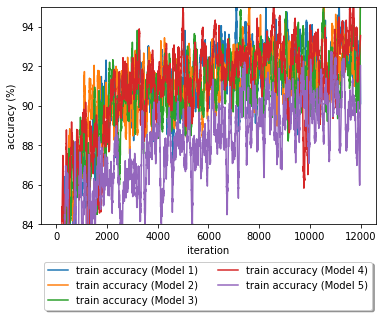

300799459


In [140]:
from scipy.signal import savgol_filter
plt.figure()
plt.ylim(84, 95)
tr_ac_1_1 = savgol_filter(train_accuracies_2a_2, 151, 3)
tr_ac_1_2 = savgol_filter(train_accuracies_1a_2, 151, 3)
tr_ac_1_3 = savgol_filter(train_accuracies_4a_2, 151, 3)
tr_ac_1_4 = savgol_filter(train_accuracies_3a_2, 151, 3)
tr_ac_1_5 = savgol_filter(train_accuracies_5a_2, 151, 3)
plt.xlabel('iteration')
plt.ylabel('accuracy (%)')
plt.plot([i for i in range(0, len(tr_ac_1_1))], tr_ac_1_1*100, label='train accuracy (Model 1)')
plt.plot([i for i in range(0, len(tr_ac_1_2))], tr_ac_1_2*100, label='train accuracy (Model 2)')
plt.plot([i for i in range(0, len(tr_ac_1_3))], tr_ac_1_3*100, label='train accuracy (Model 3)')
plt.plot([i for i in range(0, len(tr_ac_1_4))], tr_ac_1_4*100, label='train accuracy (Model 4)')
plt.plot([i for i in range(0, len(tr_ac_1_5))], tr_ac_1_5*100, label='train accuracy (Model 5)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.subplots_adjust(hspace = 0.2)
plt.savefig('MTL_MallT2_performance.png', bbox_inches="tight")
plt.show()

print(sess.run(model.compx))

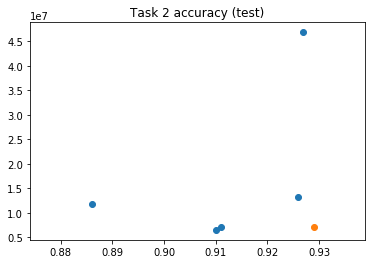

In [22]:
# Recorded values from earlier
t1a = [0.86, 0.842, 0.757, 0.859, 0.883]
t2a = [0.91, 0.911, 0.886, 0.926, 0.927]
t1b = [0.868]
t2b = [0.929]
comp_a = [6559117, 7087145, 11733001, 13149225, 46867497]
comp_b = [7087145]
plt.scatter(t2a, comp_a)
plt.scatter(t2b, comp_b)
plt.title("Task 2 accuracy (test)")
plt.savefig('scatter2.png', bbox_inches="tight")

In [133]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)
print('Test accuracy - task 2 achieved: %.3f' %acc_test_2)

Test accuracy - task 1 achieved: 0.757
Test accuracy - task 2 achieved: 0.886


In [106]:
sess.close()

#### Discuss the performance of the MTL network compared to the single task networks. What do think are the most important things to consider when using MTL?

##### Task 6.3

In this task we want you to compare the MTL's results for different values of $\lambda$. We want you to coampre $5$ different values of $\lambda$ with the stipulation that two of them must be $0$ and $1$; the other 3 are up to you. All other hyperparameters (e.g. number of dense shared layers) can be left as they were in Task 6.2. 

Plot a graph showing the Task 1 and Task 2 accuracies against values of $\lambda$. 
Comment on your results. 
Whats so special about the cases of $\lambda = 0$ and $\lambda = 1$?

####  Task 6.4

##### Similar to tasks  3.2 and 4.2

 - Plot a graph showing complexity (number of paramters) vs. accuracy for each of the to tasks in the MTL network. As above you will need to train four other additional MTL networks where you vary the number/size of the shared and  task specific layers (we advise not making the layers too large or too numerous to avoid very long training times). 
 - You should also include plots of the number of parameters vs accuracy for the individual task 1 and 2 networks - use different colours to distinguish these single task networks.
     - Note 1 : There is no need to train additional Task 1 and Task 2 networks simply use the formats from Question 6.1
     - Note 2: For all MTL formats set $\lambda$ to $0.5$ for equal weighting
     - Note 3: Due to the sub task structure, we will ignore depth in this evaluation as the two tasks can have different depth levels in the MTL architecture. 
     - Note 4: It is advised to include pooling layers (we leave the type of pooling up to you but recommned maxpooling) for the sake of training time - alternativly use larger strides. 
 
 - Discuss the effect of the number/size of the shared and task specific layers in terms of performance and training/testing times. Also compare the performance to the task specific networks from 6.1. 
 
 - Discuss the main pros and cons for multi-task learning.